In [8]:
import mountaincar
import numpy as np
import starter as st
import matplotlib.pyplot as plt
%matplotlib inline

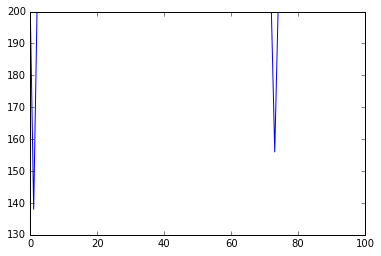

In [2]:
agent = st.Agent(temp=1e2, el_tr_rate=0.95, learn_rate=0.01)
learning_curve = agent.learn(n_trials=100)
plt.plot(learning_curve)

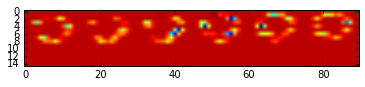

In [26]:
W = agent.net.W[0]
nx_d = agent.net.nx_d
nx = agent.net.nx
W = W.reshape(nx_d, nx)
plt.imshow(W)
plt.show()

# 1. Escape latency vs. trial number (i.e., learning curve)

# 2. Policy vs. state

# 3. Exploration vs. exploitation (temperature parameter)

# 4. Effect of eligibility trace decay rate on learning curves

# 5. Effect of the initialization of weights on learning curves